# Without sWeights: `common_DstTO3pi_BDT-1.25`

# Plot the fit
    
I just want to recreate the figure of the fit to the $_s$Weighted $m(D^*3\pi)$ with BDT > -1.25, with the colors I cherish.

In [1]:
name_data_Dstto3pi = 'common_DstTO3pi' # same as sWeights as the unconstrained case
name_BDT = 'gradient'
cut_BDT = -1.25

name_data_Dstto3pi_BDT = name_data_Dstto3pi + f'_BDT{cut_BDT}'

In [2]:
size_tau_M = 50.
mean_tau_M = 1969.
low_tau_M = mean_tau_M - size_tau_M
high_tau_M = mean_tau_M + size_tau_M

## Import

In [3]:
import zfit
import json
import numpy as np
import timeit

from numpy.random import normal

from math import sqrt

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_saved_root, load_data, add_constr_Dst, json_to_latex_table, retrieve_params, format_previous_params
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import define_zparams, sum_crystalball
from variables import name_params_B0toDstDs
import plot.tool as pt

Welcome to JupyROOT 6.22/02


## Load

### Json files

In [4]:
# Dst->3pi with BDT cut (for the B0->DstDs PDF shape)
Dstto3pi_params = format_previous_params(retrieve_params(name_data_Dstto3pi_BDT, name_folder=name_data_Dstto3pi), False) 
del Dstto3pi_params['info_fit']

### Root file

In [5]:
df_Ds = load_saved_root(name_data_Dstto3pi+f'_BDT{cut_BDT}', name_folder=name_data_Dstto3pi, vars=['tau_M', 'BDT', 'sWeight'])

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common_DstTO3pi/common_DstTO3pi_BDT-1.25.root


## Range of the variables

### Constrained $m(D^* 3\pi)$ of the `common` data

## PLOT

### Values

In [6]:
initial_values_tau = {}
for key, value in Dstto3pi_params.items():
    initial_values_tau[key] = {'value': value, 'floating':True}

### Observables and variables

In [7]:
obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
zparams_tau = define_zparams(initial_values_tau, cut_BDT=cut_BDT)

### PDFs

In [11]:
gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

data_tau = zfit.Data.from_pandas(df_Ds['tau_M'],obs=obs_tau)

### Plotting

Number of bins: 100
Width of the bins: 1.0

Number of d.o.f. in the model:  5
Reduced chi2:  1.1842506069325243

Mean of the normalised residuals: -0.06797655637951108
Std of the normalised residuals: 1.0584976449518824
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_DstTO3pi_BDT-1.25_detail/tau_M_common_DstTO3pi_BDT-1.25_detail_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (1 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

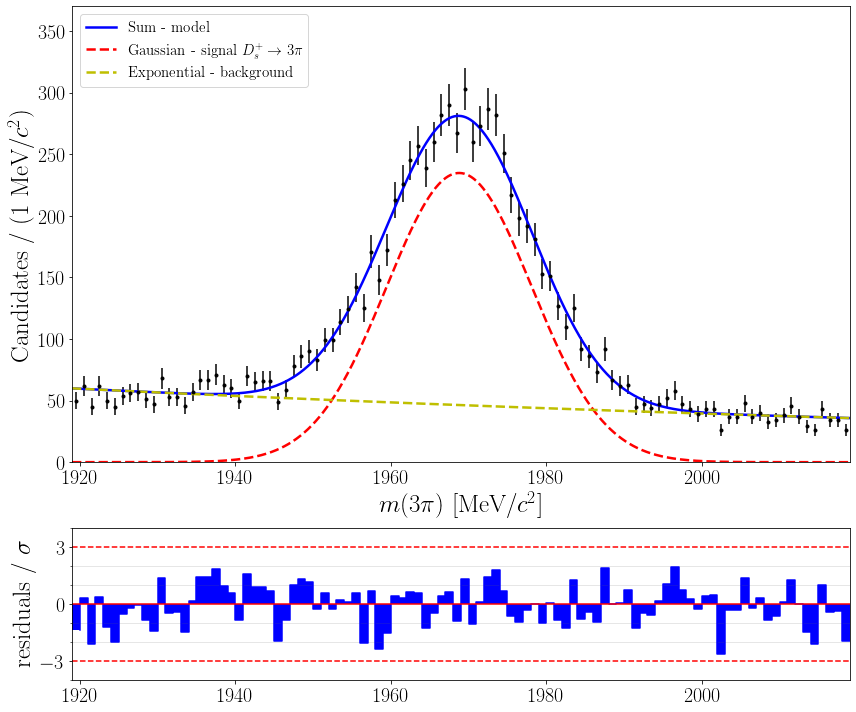

In [12]:
plot_hist_fit_particle(df_Ds,'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = ["", '$D_s^+ \\to 3\pi$',''], colors = ['b','r','y'],
                       obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data_Dstto3pi_BDT +'_detail', 
                       fontsize_leg=15.)

Number of bins: 100
Width of the bins: 1.0

Number of d.o.f. in the model:  5
Reduced chi2:  1.1842506069325243

Mean of the normalised residuals: -0.06797655637951108
Std of the normalised residuals: 1.0584976449518824
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_DstTO3pi_BDT-1.25/tau_M_common_DstTO3pi_BDT-1.25_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (1 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

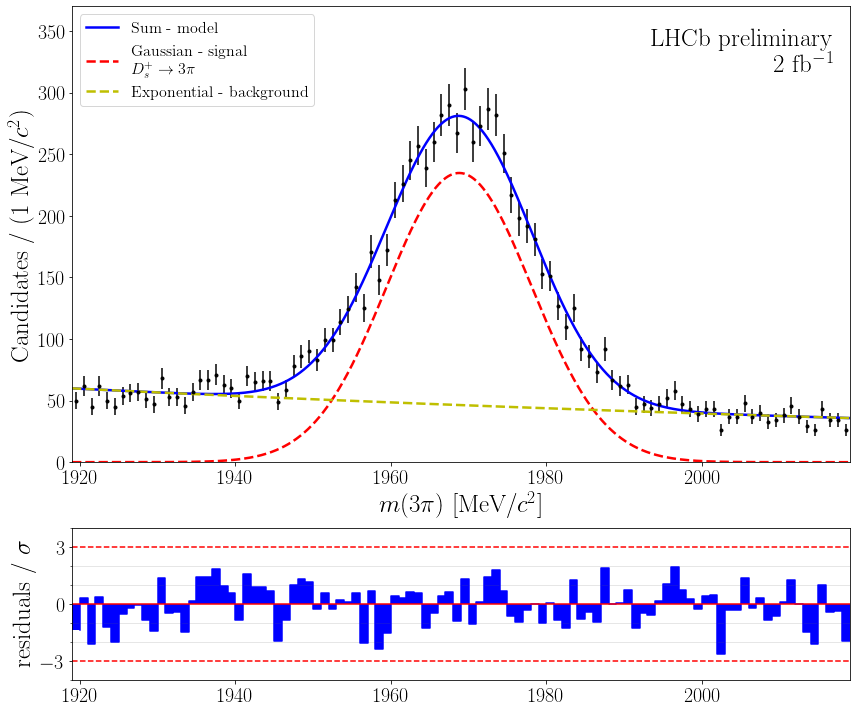

In [15]:
plot_hist_fit_particle(df_Ds,'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = ["", '\n $D_s^+ \\to 3\pi$',''], colors = ['b','r','y'],
                       obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data_Dstto3pi_BDT, 
                       fontsize_leg=16., pos_text_LHC='right', name_folder=name_data_Dstto3pi_BDT)

In [28]:
fitted_params = retrieve_params(name_data_Dstto3pi_BDT, name_folder=name_data_Dstto3pi)

### Reconputed the sWeights that were used

In [68]:
import matplotlib.pyplot as plt
from hepstats.splot import compute_sweights
import plot.tool as pt

In [39]:
weights_hep = compute_sweights(model_tau, df_Ds['tau_M'])

In [55]:
assert all(weights_hep[zparams_tau['n_sig_tau']] == df_Ds['sWeight'])

AssertionError: 

They aren't entirely the same, but well... I think this is because the PDFs.

In [61]:
mass = df_Ds['tau_M']
weights_sig = df_Ds['sWeight']
weights_bkg = weights_hep[zparams_tau['n_bkg_tau']]

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_DstTO3pi_BDT-1.25/sWeights


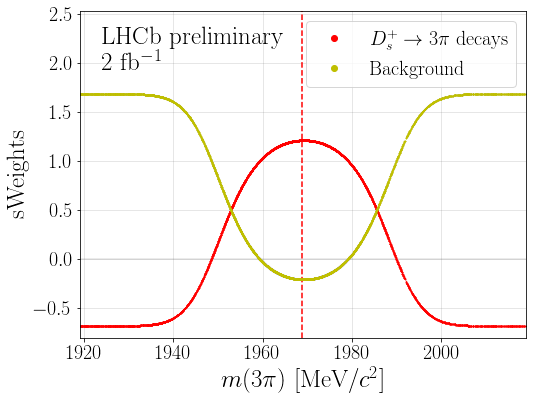

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

ax.axhline(0, c='black', ls='-', alpha=0.1)
ax.axvline(float(zparams_tau['mu_tau']), c='red', ls='--')
ax.plot(mass, weights_sig,'.', label='$D_s^+ \\to 3\pi$ decays', markersize=1., color='r')
ax.plot(mass, weights_bkg,'.', label='Background', markersize=1., color='y')
ax.set_xlim(low_tau_M, high_tau_M)



ax.set_xlabel('$m(3\pi)$ [MeV/$c^2$]',fontsize=25)
ax.set_ylabel('sWeights',fontsize=25)

ymin, ymax = ax.get_ylim()
#ax.set_ylim(ymin, ymax*1.1)
pt.fix_plot(ax, ymax=1.4, pos_text_LHC=[0.05, 0.95, 'left'], ymin_to0=False)
ax.legend(markerscale=12, fontsize=20)
pt.show_grid(ax)

pt.save_file(fig, 'sWeights', name_folder=name_data_Dstto3pi_BDT)